<a href="https://colab.research.google.com/github/JulioCesar1911/GAN-Cats.v0/blob/main/GanV0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Determining the optimal architecture for a GAN that generates images depends on several factors, including the complexity of the images you want to generate, the computational resources available, and the desired level of realism. However, some general principles can guide your architecture selection.

1. **Generator Architecture:**

   The generator's primary role is to transform a random noise vector into a meaningful image representation. Common generator architectures include:

   - **Fully Connected Networks (FCNs):** FCNs are straightforward and effective for generating simple images.

   - **Convolutional Neural Networks (CNNs):** CNNs excel at capturing spatial relationships in images, making them suitable for generating complex and realistic images.

   - **Autoencoders:** Autoencoders can learn latent representations of images, enabling them to generate new images that share similar characteristics with the training data.

2. **Discriminator Architecture:**

   The discriminator's task is to distinguish between real and fake images. Common discriminator architectures include:

   - **Patch-GANs:** Patch-GANs divide images into patches and evaluate the authenticity of each patch, making them effective for capturing local image details.

   - **Global-GANs:** Global-GANs assess the overall quality and realism of the entire image, allowing them to identify subtle inconsistencies in fake images.

3. **Loss Functions:**

   The choice of loss function influences the training process and the quality of generated images. Common loss functions for GANs include:

   - **Binary Cross-Entropy (BCE):** BCE is a straightforward loss function that measures the discrepancy between the discriminator's predictions and the true labels.

   - **Wasserstein Distance:** Wasserstein distance focuses on improving the quality of generated images and reducing mode collapse, where the generator produces a limited variety of images.

4. **Hyperparameter Tuning:**

   Hyperparameters, such as learning rates, batch sizes, and activation functions, significantly impact GAN training. Carefully tuning these hyperparameters can optimize the training process and enhance the quality of generated images.

5. **Progressive GANs:**

   Progressive GANs are a specialized architecture that gradually increases the resolution of generated images during training. This approach allows GANs to produce high-resolution images with fine details.

6. **StyleGAN:**

   StyleGAN is a state-of-the-art GAN architecture that excels at generating highly realistic images with fine details and style variations.

7. **Experimentation and Evaluation:**

   The optimal architecture for your specific task may require experimentation with different combinations of generator, discriminator, loss function, and hyperparameters. Carefully evaluating the generated images and monitoring training metrics will help you identify the most effective architecture for your project.

Remember that the field of GANs is constantly evolving, with new architectures and techniques emerging regularly. Stay informed about the latest advancements and consider incorporating them into your architecture if they align with your project goals.

In [ ]:
import sys

sys.version

'3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]'

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import requests
import zipfile
from pathlib import Path
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import random
from PIL import Image
import torchvision.utils as vutils


In [ ]:
data_path = Path("datita/")
image_path = data_path / "CatsGan" #change later
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with zipfile.ZipFile(data_path / "train.zip", "r") as zip_ref:
        print("Unzipping cats data...")
        zip_ref.extractall(image_path)


Did not find datita/CatsGan directory, creating one...
Unzipping cats data...


In [ ]:
train_dir = image_path

train_dir

PosixPath('datita/CatsGan')

In [ ]:
folder_path = image_path / "train"
print(folder_path)
pattern = 'dog.*.jpg'
dog_files = glob.glob(os.path.join(folder_path, pattern))

for file_path in dog_files:
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except OSError as e:
        print(f"Error deleting {file_path}: {e}")


[PosixPath('datita/CatsGan/train/cat.8143.jpg'), PosixPath('datita/CatsGan/train/cat.4568.jpg'), PosixPath('datita/CatsGan/train/cat.4240.jpg'), PosixPath('datita/CatsGan/train/cat.11526.jpg'), PosixPath('datita/CatsGan/train/cat.6062.jpg'), PosixPath('datita/CatsGan/train/cat.6972.jpg'), PosixPath('datita/CatsGan/train/cat.1623.jpg'), PosixPath('datita/CatsGan/train/cat.1198.jpg'), PosixPath('datita/CatsGan/train/cat.9421.jpg'), PosixPath('datita/CatsGan/train/cat.3561.jpg'), PosixPath('datita/CatsGan/train/cat.4679.jpg'), PosixPath('datita/CatsGan/train/cat.5700.jpg'), PosixPath('datita/CatsGan/train/cat.8335.jpg'), PosixPath('datita/CatsGan/train/cat.11405.jpg'), PosixPath('datita/CatsGan/train/cat.2733.jpg'), PosixPath('datita/CatsGan/train/cat.11284.jpg'), PosixPath('datita/CatsGan/train/cat.9072.jpg'), PosixPath('datita/CatsGan/train/cat.597.jpg'), PosixPath('datita/CatsGan/train/cat.11127.jpg'), PosixPath('datita/CatsGan/train/cat.1254.jpg'), PosixPath('datita/CatsGan/train/cat.

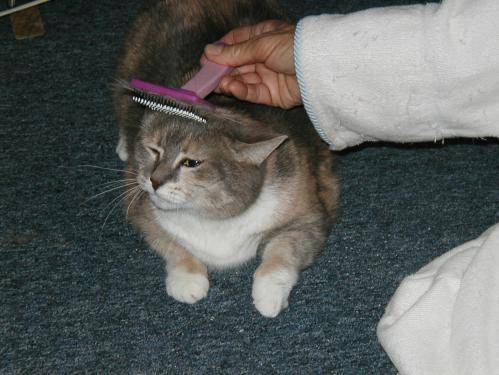

In [ ]:
random.seed(41)
image_path_list = list(data_path.glob("*/*/*.jpg"))
print(image_path_list)
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
workers = 2

batch_size = 128

image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 20
# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

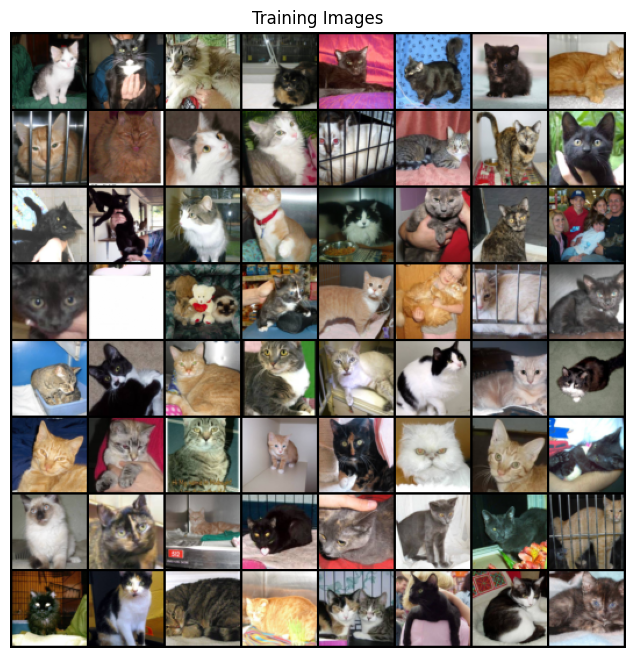

In [ ]:

dataset = torchvision.datasets.ImageFolder(root=image_path,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
img = dataset[0][0]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")

Image tensor:
tensor([[[ 0.9059,  0.9137,  0.9294,  ...,  0.9765,  0.9608,  0.9529],
         [ 0.9059,  0.9137,  0.9216,  ...,  0.9765,  0.9608,  0.9529],
         [ 0.9059,  0.9137,  0.9216,  ...,  0.9765,  0.9608,  0.9608],
         ...,
         [-0.4275, -0.4980, -0.4431,  ..., -0.4275, -0.6392, -0.8039],
         [-0.4039, -0.5059, -0.4510,  ..., -0.6000, -0.7098, -0.8118],
         [-0.3804, -0.5216, -0.4824,  ..., -0.8667, -0.8902, -0.9216]],

        [[ 0.5686,  0.5765,  0.5922,  ...,  0.7804,  0.7961,  0.8039],
         [ 0.5686,  0.5765,  0.5843,  ...,  0.7804,  0.7961,  0.8039],
         [ 0.5686,  0.5765,  0.5843,  ...,  0.7804,  0.7961,  0.8039],
         ...,
         [-0.5686, -0.6392, -0.6078,  ..., -0.5843, -0.7176, -0.8353],
         [-0.5451, -0.6471, -0.6157,  ..., -0.6941, -0.7725, -0.8510],
         [-0.5137, -0.6471, -0.6392,  ..., -0.8745, -0.9059, -0.9216]],

        [[-0.0510, -0.0431, -0.0275,  ...,  0.2000,  0.2078,  0.2157],
         [-0.0510, -0.0431, -0.

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

Creating the generator and discriminator networks

In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu

        self.init_block = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        )

        self.down_blocks = nn.ModuleList([
            nn.Sequential(
                nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(inplace=True)
            ),
            nn.Sequential(
                nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True)
            ),
            nn.Sequential(
                nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True)
            )
        ])

        self.final_block = nn.Sequential(
            nn.ConvTranspose2d(64, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, z):
        x = self.init_block(z)

        for down_block in self.down_blocks:
            x = down_block(x)

        x = self.final_block(x)
        return x


netG = Generator(ngpu).to(device)

if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
netG.apply(weights_init)


print(netG)
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.init_block = nn.Sequential(
            nn.Conv2d(nc, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True)
        )

        self.down_blocks = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(0.2, inplace=True)
            ),
            nn.Sequential(
                nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(0.2, inplace=True)
            ),
            nn.Sequential(
                nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(0.2, inplace=True)
            )
        ])

        self.final_block = nn.Sequential(
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.init_block(x)

        for down_block in self.down_blocks:
            x = down_block(x)

        x = self.final_block(x)
        return x.view(-1)
netD = Discriminator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
netD.apply(weights_init)

print(netD)

Generator(
  (init_block): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (down_blocks): ModuleList(
    (0): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inp

Creating the generator and dioscriminator objects

Defining the loss functions for both

In [ ]:
criterion_gen = nn.BCELoss()
criterion_dis = nn.BCELoss()
criterion = nn.BCELoss()

fixed_noise = torch.randn(64, nz, 1, 1, device=device)
real_label = 1.
fake_label = 0.
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


Train the generator and discriminator in an adverarial way

In [ ]:

img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):

        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/5][0/98]	Loss_D: 1.7388	Loss_G: 4.2520	D(x): 0.3899	D(G(z)): 0.4208 / 0.0192
[0/5][50/98]	Loss_D: 0.0206	Loss_G: 6.1448	D(x): 0.9849	D(G(z)): 0.0048 / 0.0049
[1/5][0/98]	Loss_D: 0.2395	Loss_G: 4.6741	D(x): 0.9144	D(G(z)): 0.1252 / 0.0133
[1/5][50/98]	Loss_D: 0.5930	Loss_G: 3.4949	D(x): 0.7428	D(G(z)): 0.1785 / 0.0563
[2/5][0/98]	Loss_D: 0.4671	Loss_G: 2.8339	D(x): 0.8593	D(G(z)): 0.2423 / 0.0699
[2/5][50/98]	Loss_D: 0.3382	Loss_G: 5.3495	D(x): 0.8978	D(G(z)): 0.1115 / 0.0064
[3/5][0/98]	Loss_D: 0.3301	Loss_G: 3.7852	D(x): 0.8269	D(G(z)): 0.0555 / 0.0313
[3/5][50/98]	Loss_D: 0.6154	Loss_G: 3.7148	D(x): 0.7993	D(G(z)): 0.2611 / 0.0414
[4/5][0/98]	Loss_D: 0.9308	Loss_G: 2.6864	D(x): 0.6004	D(G(z)): 0.1784 / 0.1050
[4/5][50/98]	Loss_D: 0.6042	Loss_G: 4.0251	D(x): 0.6432	D(G(z)): 0.0412 / 0.0303


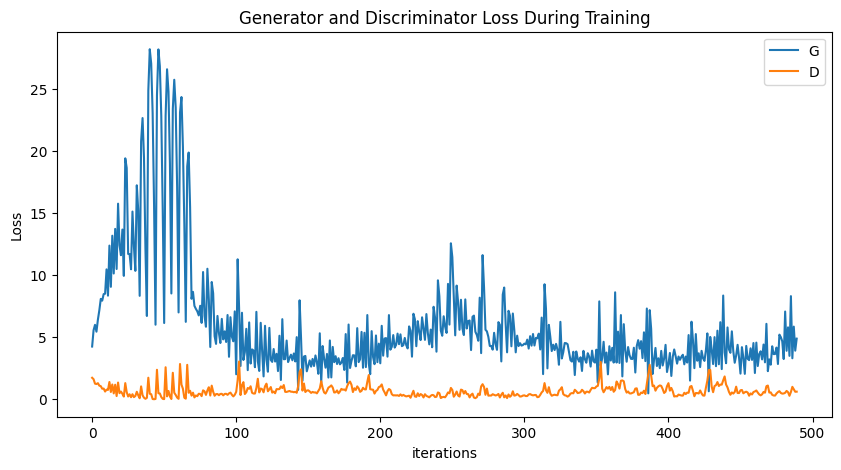

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

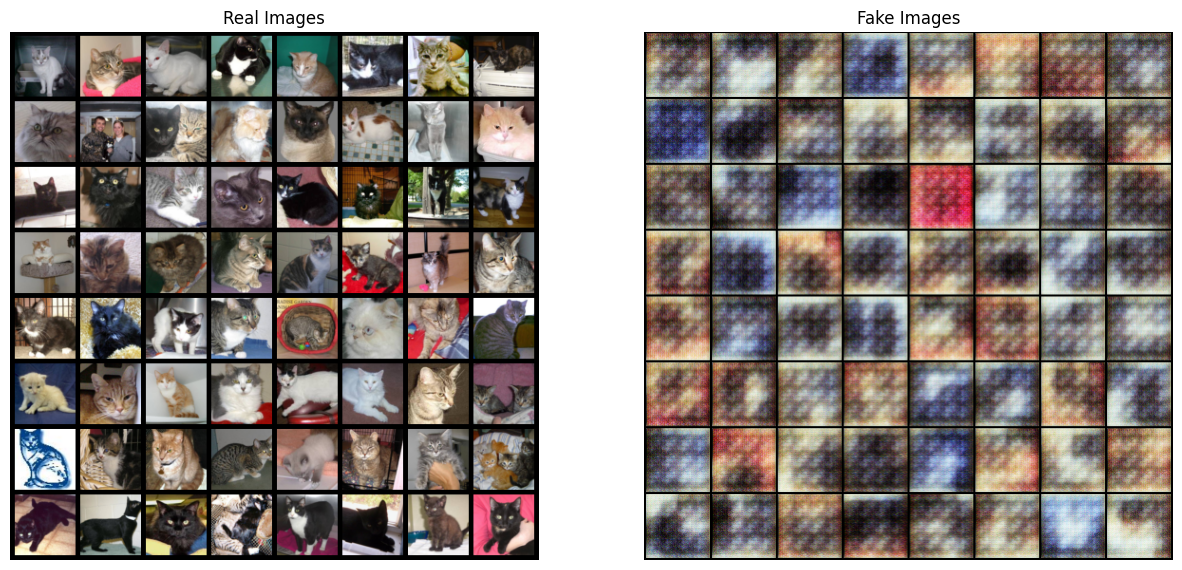

In [ ]:
real_batch = next(iter(dataloader))

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()